<a href="https://colab.research.google.com/github/ahmedhussin12/Students-Performance/blob/main/Netflix__Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df.shape

(6234, 11)

In [6]:
df.drop(['director'],axis=1,inplace=True)

In [7]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
df['country'].replace(np.nan,'United States',inplace=True)
df['cast'].replace(np.nan,'no data',inplace=True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [11]:
df.dropna(inplace=True)


In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
df['date_added']=pd.to_datetime(df['date_added'])

In [17]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [18]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_name_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September,2016,9
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September,2018,9
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September,2017,9


In [20]:
df.drop('date_added',axis=1,inplace=True)

In [21]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_name_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,September,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,September,2016,9
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",September,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,September,2018,9
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,September,2017,9


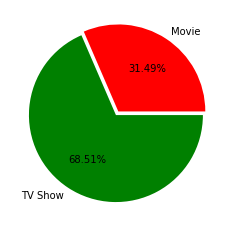

In [33]:
pi=plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0], autopct='%1.2f%%',colors=['red','green'])

In [59]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)

In [60]:
top20country = country_count.head(20)
top20country

United States     3072
India              838
United Kingdom     601
Canada             318
France             271
Japan              229
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          124
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Brazil              66
Italy               66
Belgium             66
Thailand            56
dtype: int64

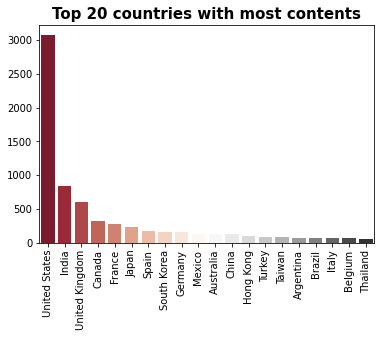

In [72]:
ax=plt.subplot()
sns.barplot(top20country.index, top20country,ax=ax, palette="RdGy")
ax.set_xticklabels(top20country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [74]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]




In [79]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')

In [80]:
df_content.head()

,year_added,count
11,2008,2
10,2009,2
12,2010,1
7,2011,13
9,2012,7


In [81]:
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))

In [82]:
df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

In [83]:
t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [84]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))
df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [85]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [101]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie].sort_values(ascending=True)
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0).sort_values(ascending=True)
movie_rating.head()

NC-17        2
TV-Y7-FV    27
G           36
TV-Y        41
TV-Y7       69
Name: rating, dtype: int64

Text(0.5, 1.0, 'the distrubution of movie ratings')

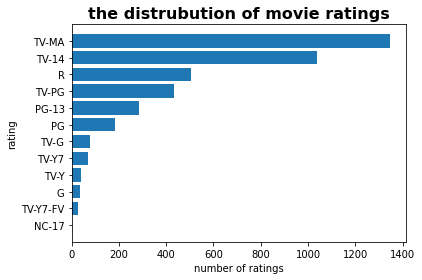

In [99]:
plt.barh(movie_rating.index,movie_rating)
plt.ylabel('rating')
plt.xlabel('number of ratings')
plt.title('the distrubution of movie ratings', fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'the distrubution of movie ratings')

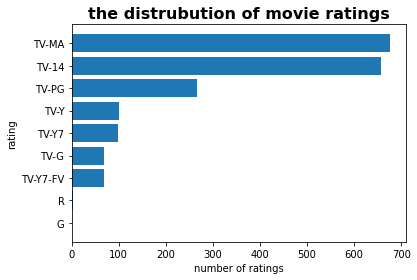

In [102]:
plt.barh(tv_rating.index,tv_rating)
plt.ylabel('rating')
plt.xlabel('number of ratings')
plt.title('the distrubution of movie ratings', fontsize=16, fontweight='bold')